In [1]:
import pandas as pd

# URLs for each CSV file in your GitHub repository
urls = {
    'AM_and_winger_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Attacking%20Midfielders%20and%20Wingers/Attacking%20Mid%20and%20Winger%20Role%20Scores.csv',
    'RB_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Right%20Backs/Right%20Back%20Role%20Scores.csv',
    'CB_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Center%20Backs/Center%20Back%20Role%20Scores.csv',
    'FW_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Forwards/Forward%20Role%20Scores.csv',
    'LB_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Left%20Backs/Left%20Back%20Role%20Scores.csv',
    'CM_scores': 'https://raw.githubusercontent.com/Jbuck1016/Player-Recommendation-System/main/Player%20Metrics/Center%20Midfielders/Center%20Midfielder%20Role%20Scores.csv'
}


# Load each CSV file from the URL
AM_and_winger_scores = pd.read_csv(urls['AM_and_winger_scores'])
RB_scores = pd.read_csv(urls['RB_scores'])
CB_scores = pd.read_csv(urls['CB_scores'])
FW_scores = pd.read_csv(urls['FW_scores'])
LB_scores = pd.read_csv(urls['LB_scores'])  # Assuming you will get a similar tokenized URL for the raw CSV
CM_scores = pd.read_csv(urls['CM_scores'])


In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

# Load the player metrics data for AM and Winger scores

AM_and_winger_scores.set_index('player', inplace=True)

# Define the metric columns
metric_columns = ['wide_creator_score', 'central_creator_score', 'goal_threat_score', 'dribbler_score', 'defensive_score']

# Handle missing values
AM_and_winger_scores = AM_and_winger_scores.dropna(subset=metric_columns)

# Function to normalize player metrics
def normalize_player_metrics(df, metric_columns):
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[metric_columns] = scaler.fit_transform(df[metric_columns])
    return df_normalized

# Normalize the player metrics
normalized_am_and_winger_df = normalize_player_metrics(AM_and_winger_scores, metric_columns)

# Function to calculate the similarity matrix
def calculate_similarity_matrix(df_normalized, metric_columns):
    distance_matrix = distance.cdist(df_normalized[metric_columns], df_normalized[metric_columns], 'euclidean')
    similarity_scores = 100 * (1 - (distance_matrix / distance_matrix.max()))
    similarity_df = pd.DataFrame(similarity_scores, index=df_normalized.index, columns=df_normalized.index)
    return similarity_df

# Calculate the player similarity
player_similarity = calculate_similarity_matrix(normalized_am_and_winger_df, metric_columns)

# Display the player similarity DataFrame with player names as index and column labels
player_similarity.index.name = 'Player'
player_similarity.columns.name = 'Player'
player_similarity
# For a better view, display the player names along with a subset of the similarity matrix


KeyError: ['wide_creator_score', 'central_creator_score', 'goal_threat_score', 'dribbler_score', 'defensive_score']

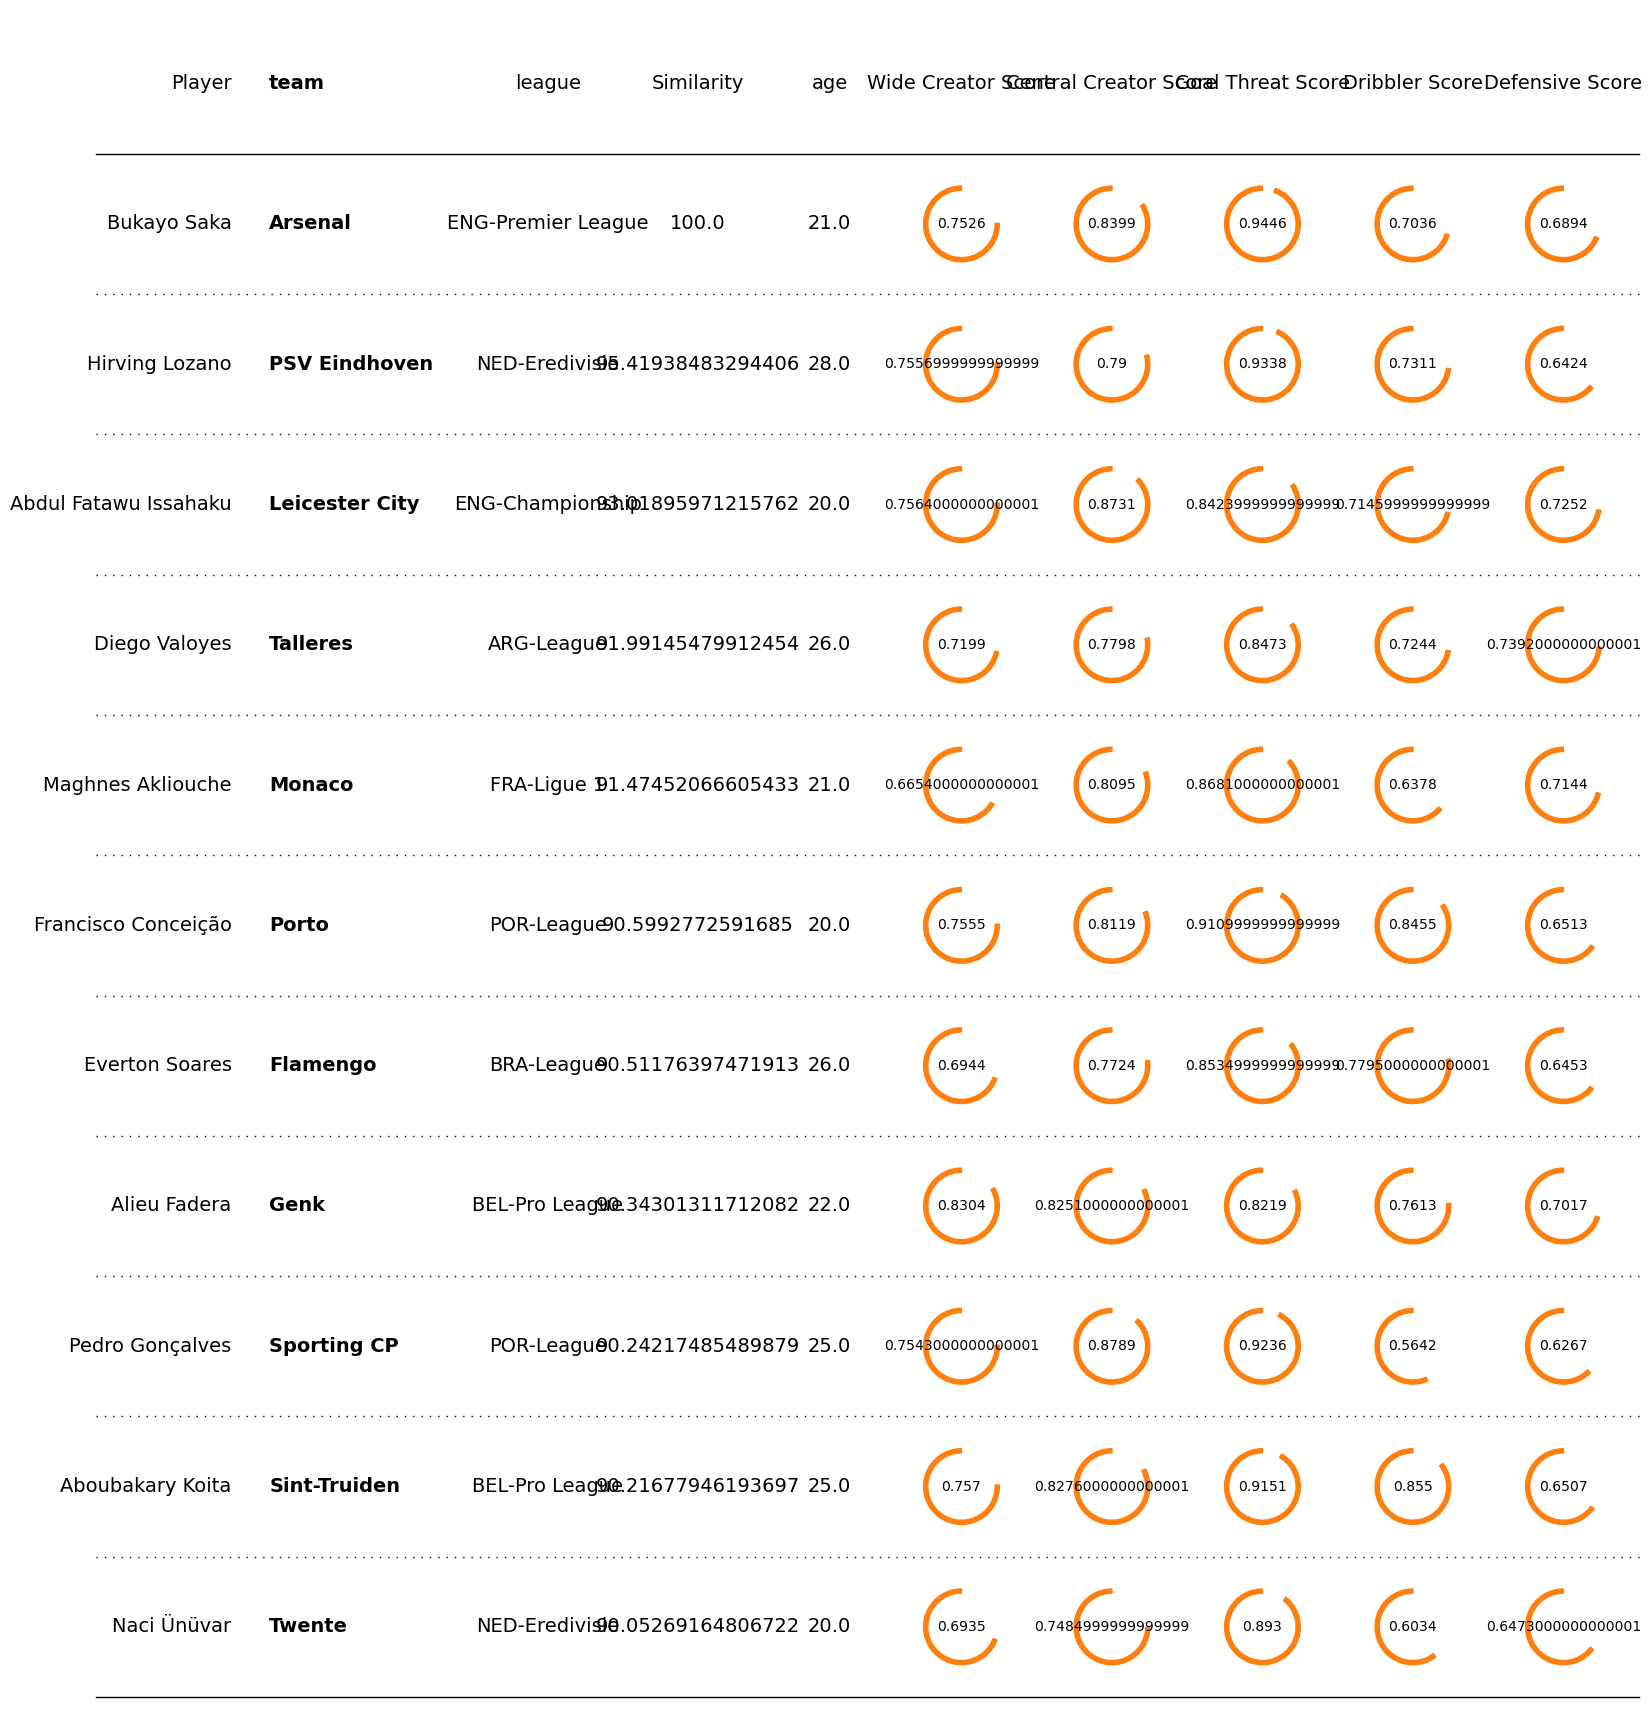

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names
columns = [
    "team",
    "league",
    "Similarity",
    "age",
    "wide_creator_score",
    "central_creator_score",
    "goal_threat_score",
    "dribbler_score",
    "defensive_score",
]

# Assuming the dataframes player_similarity and normalized_am_and_winger_df are already loaded
# Extract similarity scores for Bukayo Saka
saka_similarity = player_similarity.loc["Bukayo Saka"].drop("Bukayo Saka")
top_10_similar = saka_similarity.nlargest(10)

# Fetch details for the top 10 similar players
top_10_details = normalized_am_and_winger_df.loc[top_10_similar.index]
top_10_details["Similarity"] = top_10_similar.values

# Add Bukayo Saka at the top
bukayo_saka_details = normalized_am_and_winger_df.loc[["Bukayo Saka"]]
bukayo_saka_details["Similarity"] = 100.0

# Combine Bukayo Saka with the top 10 similar players
final_table = pd.concat([bukayo_saka_details, top_10_details])



# Ensure the columns are ordered correctly
final_table = final_table[columns]

# Define the column definitions for the table
col_defs = [
    ColumnDefinition(name="team", textprops={"ha": "left", "weight": "bold"}, width=1.5),
    ColumnDefinition(name="league", textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="Similarity", textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="wide_creator_score", title="Wide Creator Score", plot_fn=progress_donut, plot_kw={"is_pct": True}, textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="central_creator_score", title="Central Creator Score", plot_fn=progress_donut, plot_kw={"is_pct": True}, textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="goal_threat_score", title="Goal Threat Score", plot_fn=progress_donut, plot_kw={"is_pct": True}, textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="dribbler_score", title="Dribbler Score", plot_fn=progress_donut, plot_kw={"is_pct": True}, textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="defensive_score", title="Defensive Score", plot_fn=progress_donut, plot_kw={"is_pct": True}, textprops={"ha": "center"}, width=1.0),
    ColumnDefinition(name="age", textprops={"ha": "center"}, width=0.75),
]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 22))

# Create and style the table using plottable
table = Table(
    final_table,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

# Show the plot
plt.show()


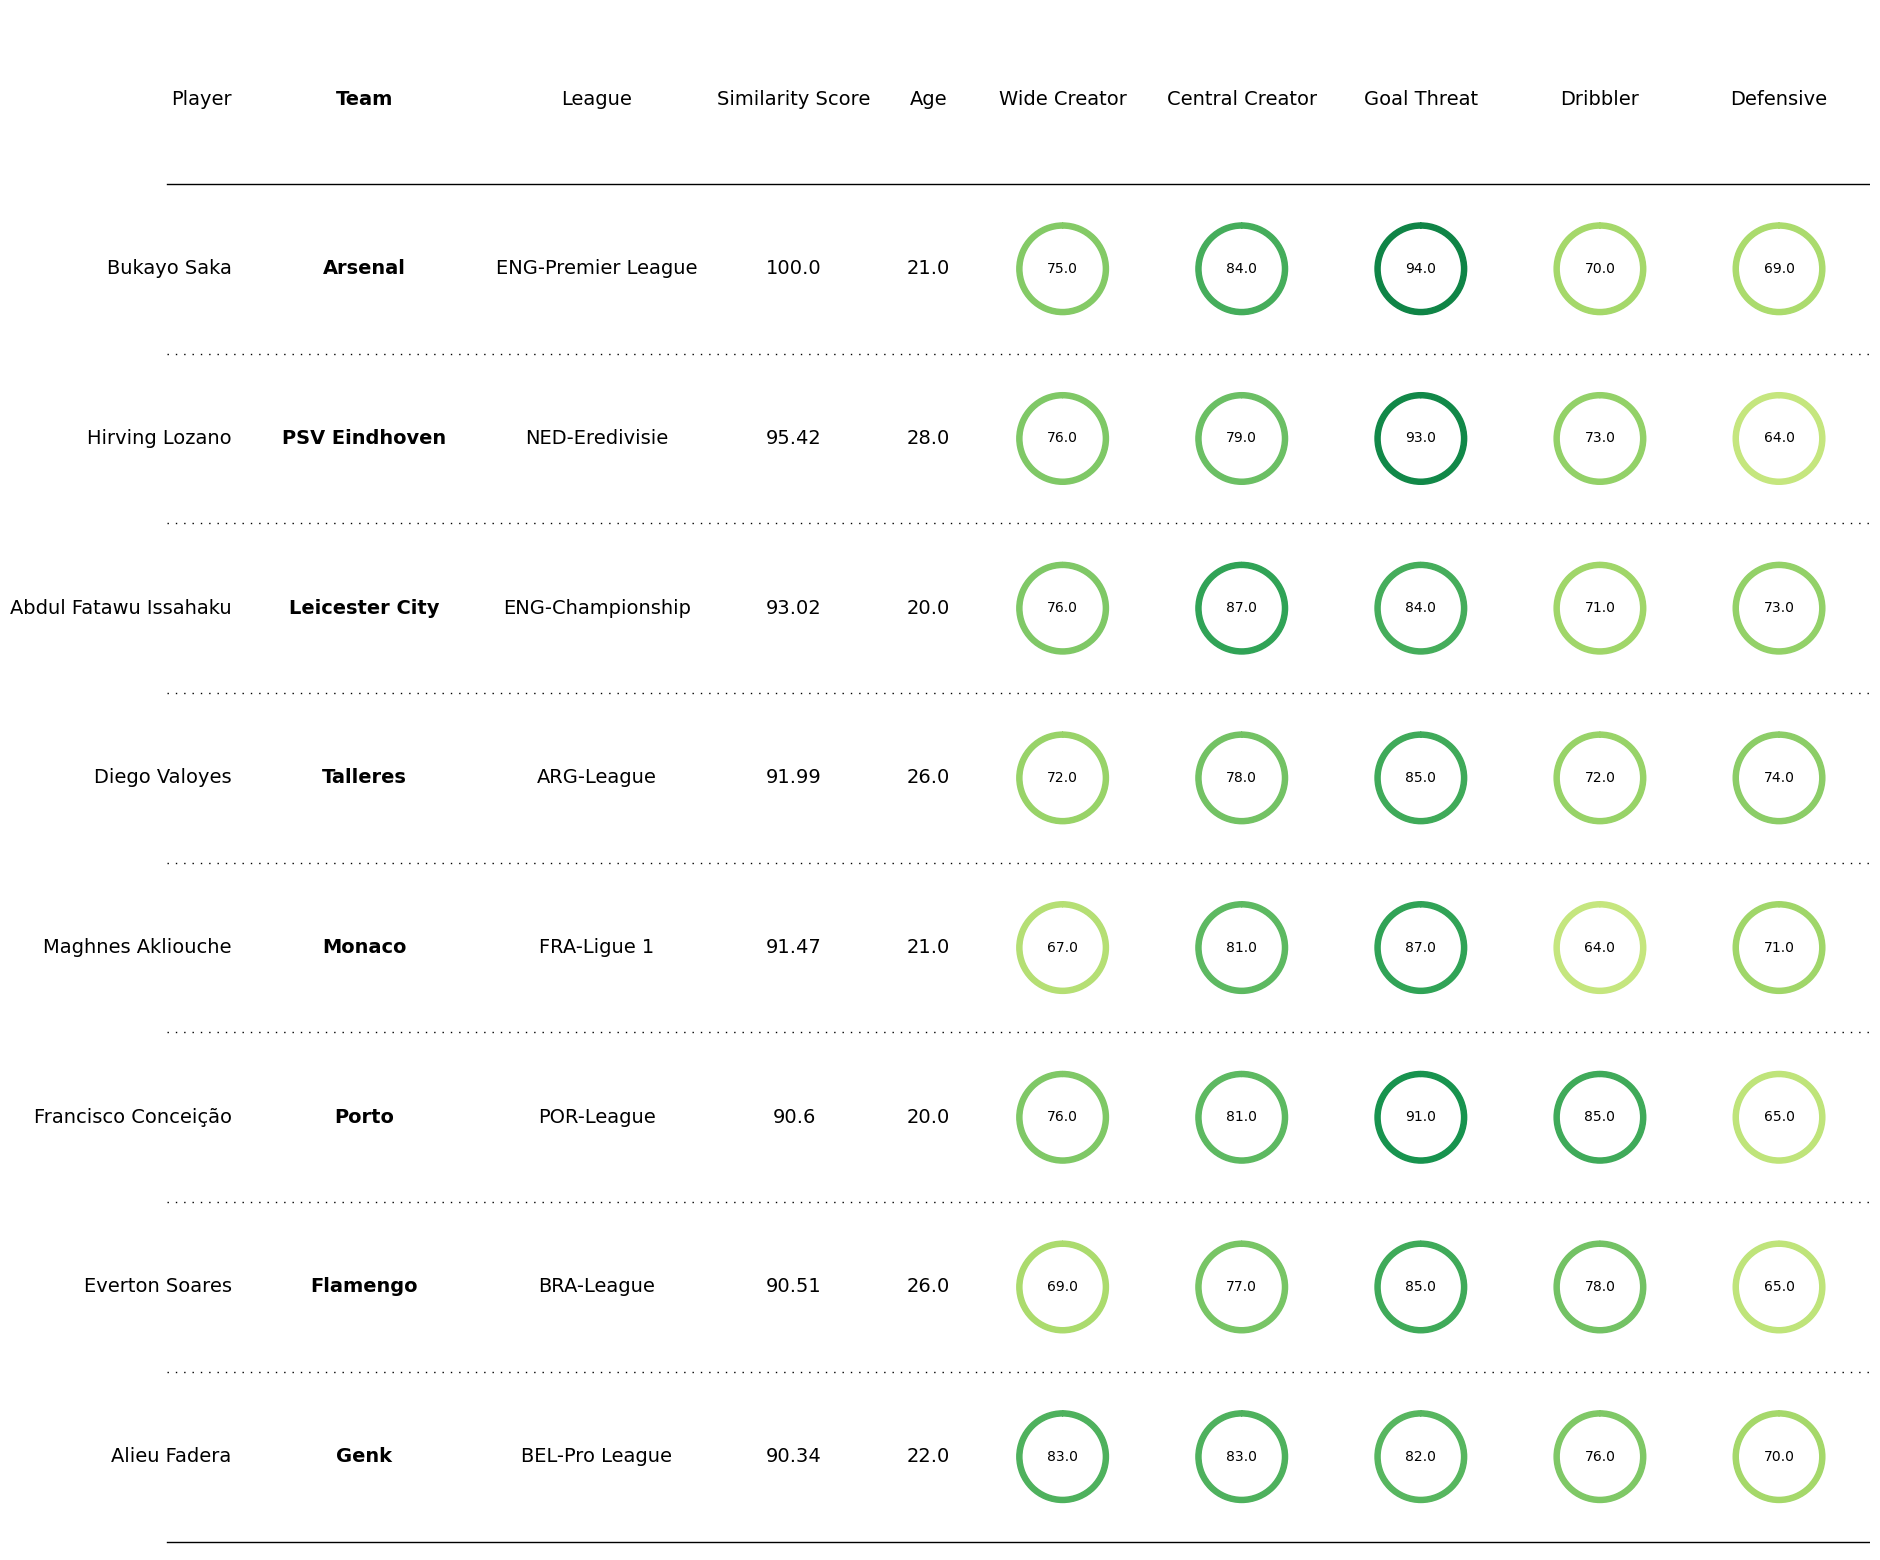

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names
columns = [
    "Team",
    "League",
    "Similarity Score",
    "Age",
    "wide_creator_score",
    "central_creator_score",
    "goal_threat_score",
    "dribbler_score",
    "defensive_score",
]

# Assuming the dataframes player_similarity and normalized_am_and_winger_df are already loaded
# Extract similarity scores for Bukayo Saka
saka_similarity = player_similarity.loc["Bukayo Saka"].drop("Bukayo Saka")
top_10_similar = saka_similarity.nlargest(7)

# Fetch details for the top 10 similar players
top_10_details = normalized_am_and_winger_df.loc[top_10_similar.index]
top_10_details["Similarity"] = top_10_similar.values

# Add Bukayo Saka at the top
bukayo_saka_details = normalized_am_and_winger_df.loc[["Bukayo Saka"]]
bukayo_saka_details["Similarity"] = 100.0

# Combine Bukayo Saka with the top 10 similar players
final_table = pd.concat([bukayo_saka_details, top_10_details])

# Round all decimal values to 2 decimal places
final_table = final_table.round(2)
score_columns = [
    "wide_creator_score", 
    "central_creator_score", 
    "goal_threat_score", 
    "dribbler_score", 
    "defensive_score"
]
final_table[score_columns] = final_table[score_columns] * 100

# Rename the columns
final_table.rename(columns={
    "team": "Team",
    "league": "League",
    "Similarity": "Similarity Score",
    "age": "Age"
}, inplace=True)

# Ensure the columns are ordered correctly
final_table = final_table[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Team", textprops={"ha": "center", "weight": "bold"}, width=3.5),
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="Similarity Score", textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="wide_creator_score", title="Wide Creator", 
                     plot_fn=lambda ax, val, **kwargs: progress_donut(ax, val, color=get_color(val), is_pct=True, **kwargs), 
                     plot_kw={}, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="central_creator_score", title="Central Creator", 
                     plot_fn=lambda ax, val, **kwargs: progress_donut(ax, val, color=get_color(val), is_pct=True, **kwargs), 
                     plot_kw={}, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="goal_threat_score", title="Goal Threat", 
                     plot_fn=lambda ax, val, **kwargs: progress_donut(ax, val, color=get_color(val), is_pct=True, **kwargs), 
                     plot_kw={}, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="dribbler_score", title="Dribbler", 
                     plot_fn=lambda ax, val, **kwargs: progress_donut(ax, val, color=get_color(val), is_pct=True, **kwargs), 
                     plot_kw={}, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="defensive_score", title="Defensive", 
                     plot_fn=lambda ax, val, **kwargs: progress_donut(ax, val, color=get_color(val), is_pct=True, **kwargs), 
                     plot_kw={}, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Age", textprops={"ha": "center"}, width=1.25),
]

# Create the plot
fig, ax = plt.subplots(figsize=(22, 20))

# Create and style the table using plottable
table = Table(
    final_table,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

# Show the plot
plt.show()


In [89]:
player_similarity

Player,Bukayo Saka,Gabriel Martinelli,Kai Havertz,Leandro Trossard,Martin Ødegaard,Jacob Ramsey,John McGinn,Leon Bailey,Morgan Rogers,Nicolò Zaniolo,...,Aaron Nicolás Molinas,Alexis Castro,Cristian Zabala,Facundo Colidio,Lucas Menossi,Elías Cabrera,Gianluca Prestianni,Julián Fernández,Lucas Janson,Walter Bou
Player,,,,,,,,,,,,,,,,,,,,,
Bukayo Saka,100.000000,83.763372,71.551701,83.524668,82.486233,74.025126,78.891785,75.795569,64.690411,63.622984,...,81.147016,73.449562,48.398349,78.267139,76.320958,82.593233,83.204402,66.052350,45.490764,74.093561
Gabriel Martinelli,83.763372,100.000000,71.454394,86.147173,77.601670,80.522338,71.478298,77.023400,73.119665,71.681278,...,76.674371,61.328466,50.777050,84.509199,70.884534,73.517553,85.588029,70.737290,53.533620,71.616913
Kai Havertz,71.551701,71.454394,100.000000,82.215362,75.250964,78.403376,77.749481,67.404188,79.102881,67.516090,...,66.854772,61.124126,45.989659,71.122647,68.326468,72.514986,63.148299,59.874675,61.535180,76.161653
Leandro Trossard,83.524668,86.147173,82.215362,100.000000,77.462735,87.494202,78.163891,70.854963,77.735874,75.662882,...,79.038119,66.881407,53.912857,77.565034,76.500731,77.962593,77.809613,71.470841,59.170111,83.539166
Martin Ødegaard,82.486233,77.601670,75.250964,77.462735,100.000000,71.475765,83.475993,84.795337,68.986172,57.645711,...,74.205416,68.843240,45.745252,84.952572,72.772221,81.698349,75.558165,61.581354,47.941934,66.597609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Elías Cabrera,82.593233,73.517553,72.514986,77.962593,81.698349,75.262538,91.706921,71.348160,67.800033,63.532041,...,85.595478,83.691350,57.170761,74.904066,85.908037,100.000000,78.121421,70.870920,52.071566,76.132305
Gianluca Prestianni,83.204402,85.588029,63.148299,77.809613,75.558165,75.624659,72.745940,74.165877,66.466162,67.665370,...,83.504606,67.966071,56.651686,80.888412,75.879504,78.121421,100.000000,76.016177,49.742846,69.114939
Julián Fernández,66.052350,70.737290,59.874675,71.470841,61.581354,79.974036,68.139482,56.104252,70.189437,73.470235,...,81.374845,64.931947,79.178591,65.967093,79.182567,70.870920,76.016177,100.000000,63.255939,73.403207


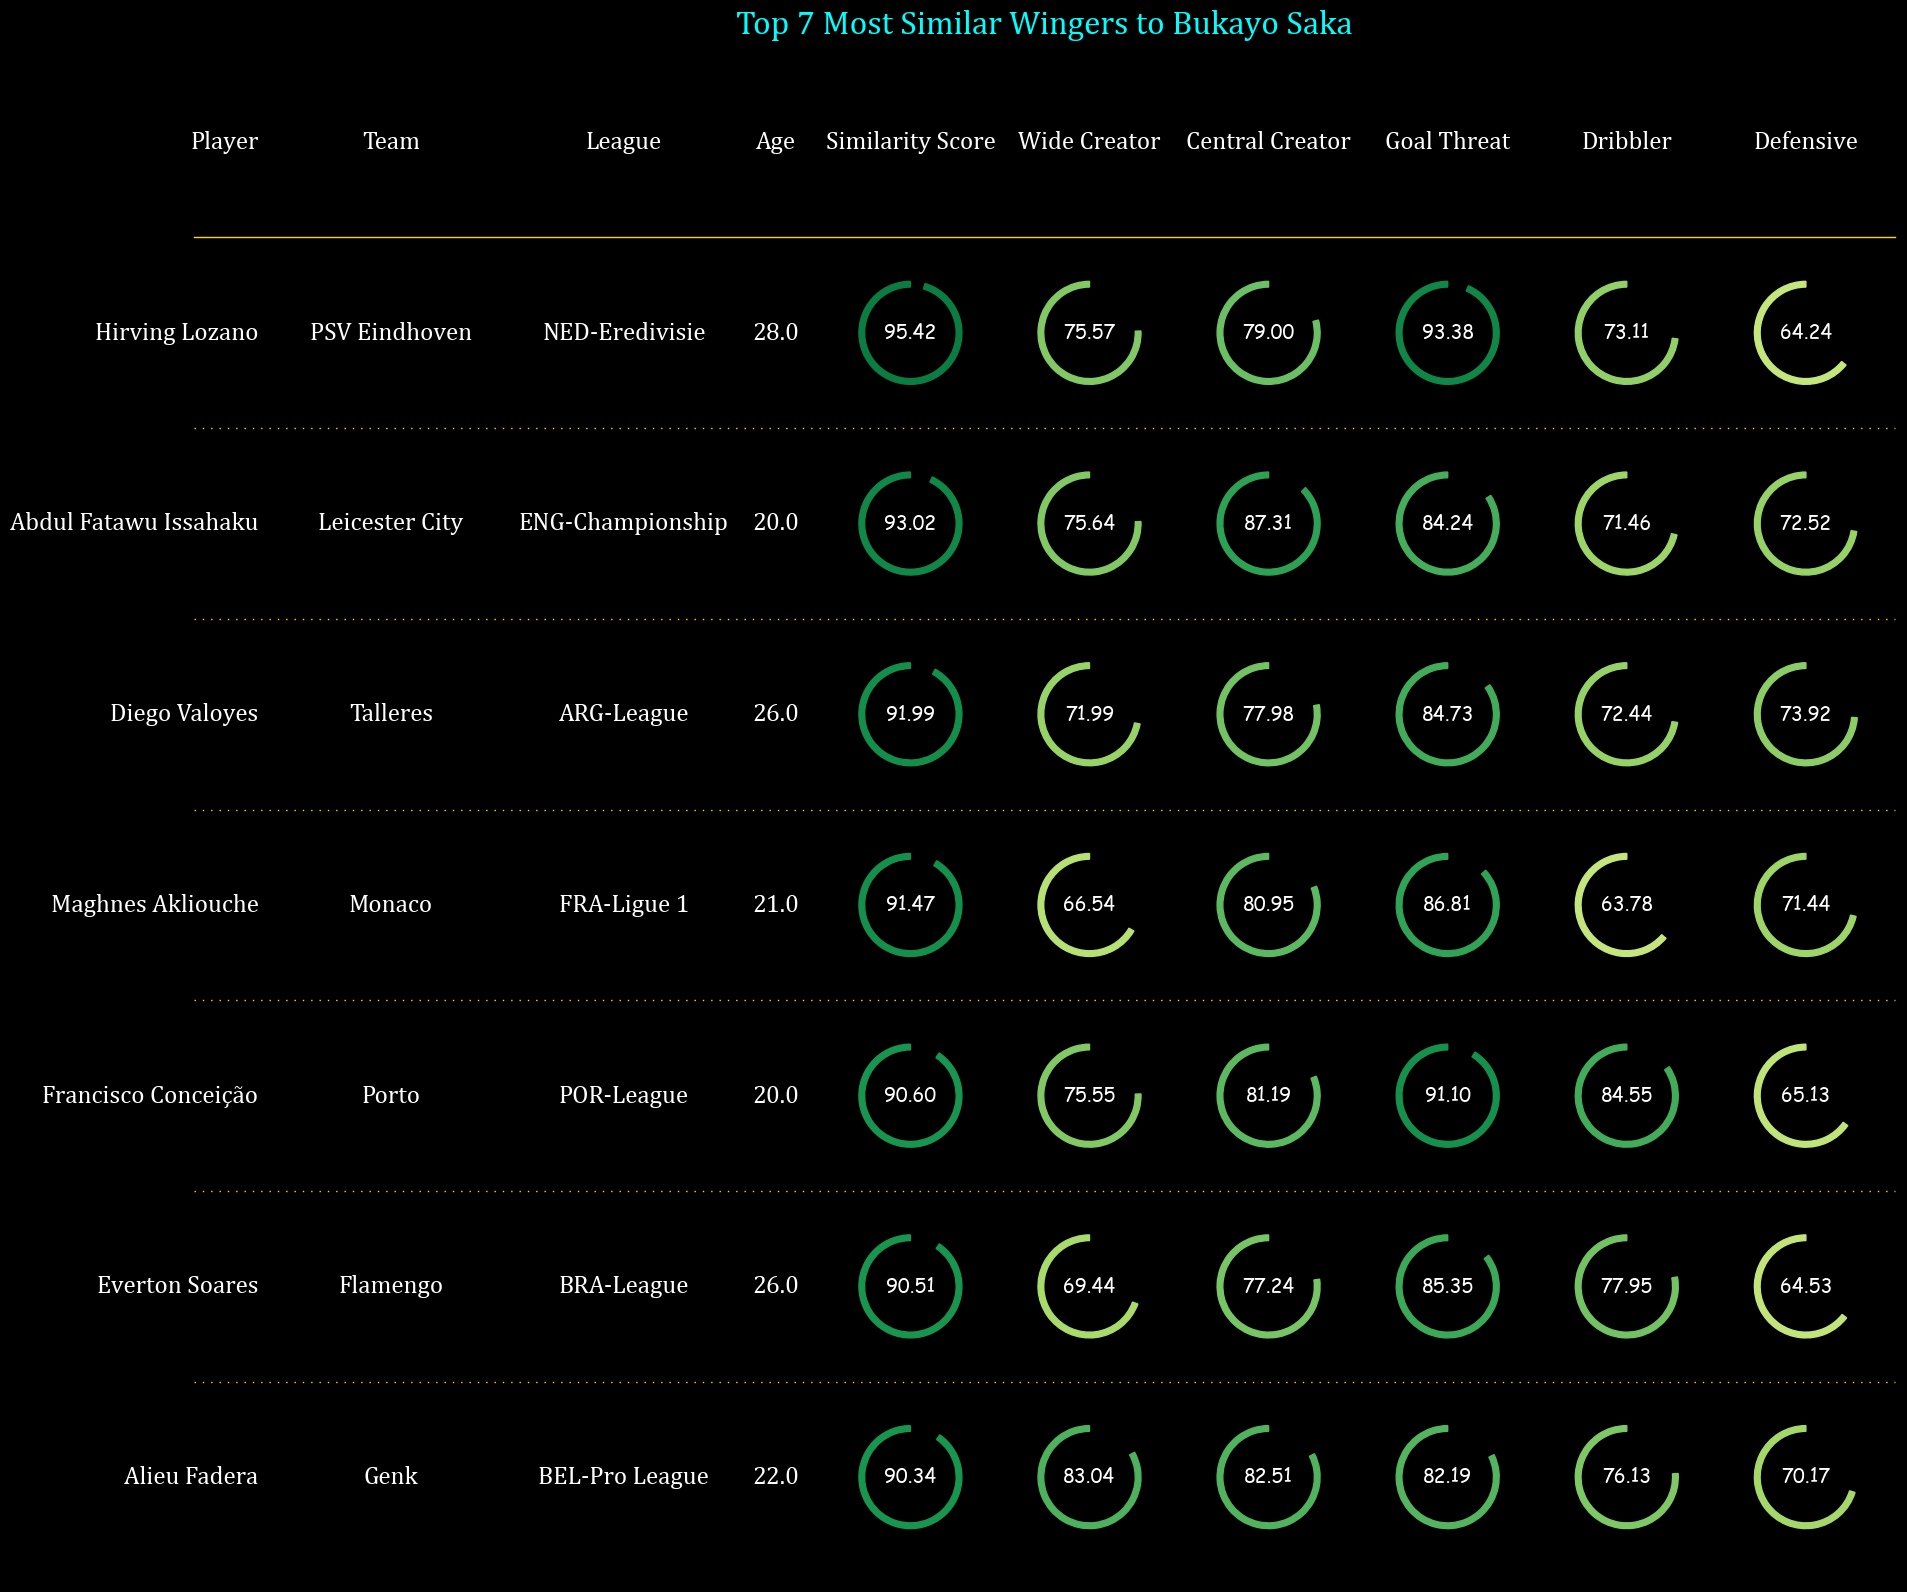

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names
columns = [
    "Team",
    "League",
    "Age",
    "Similarity Score",
    "wide_creator_score",
    "central_creator_score",
    "goal_threat_score",
    "dribbler_score",
    "defensive_score",
]

# Assuming the dataframes player_similarity and normalized_am_and_winger_df are already loaded
# Define player and position for the title
player_name = "Bukayo Saka"
position = "Winger"

# Extract similarity scores for Bukayo Saka
saka_similarity = player_similarity.loc[player_name].drop(player_name)
top_10_similar = saka_similarity.nlargest(7)

# Fetch details for the top 7 similar players
top_7_details = normalized_am_and_winger_df.loc[top_10_similar.index]
top_7_details["Similarity"] = top_10_similar.values

# Round all decimal values to 2 decimal places
top_7_details = top_7_details.round(4)
score_columns = [
    "wide_creator_score", 
    "central_creator_score", 
    "goal_threat_score", 
    "dribbler_score", 
    "defensive_score"
]
top_7_details[score_columns] = top_7_details[score_columns] * 100

# Rename the columns
top_7_details.rename(columns={
    "team": "Team",
    "league": "League",
    "Similarity": "Similarity Score",
    "age": "Age"
}, inplace=True)

# Ensure the columns are ordered correctly
top_7_details = top_7_details[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 14, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Team", textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="wide_creator_score", title="Wide Creator", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="central_creator_score", title="Central Creator", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="goal_threat_score", title="Goal Threat", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="dribbler_score", title="Dribbler", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="defensive_score", title="Defensive", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Age", textprops={"ha": "center"}, width=1.25),
]

# Create the plot
fig, ax = plt.subplots(figsize=(22, 20))
fig.patch.set_facecolor('black')  # Set figure background color to black
ax.set_facecolor('black') 

# Add title to the plot
plt.title(f"Top 7 Most Similar {position}s to {player_name}", color='cyan', fontsize=24, fontname='Cambria')

# Create and style the table using plottable
table = Table(
    top_7_details,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 18, "color": "white", 'fontname': 'Cambria'},  # Set text color to white
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
)

# Show the plot
plt.show()
